## Q2_Mortality_in_US_per_Gender

## Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the cleaned data frame

In [2]:
df = pd.read_csv("USCDI_Cleaned.csv")
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2015,2019,SD,South Dakota,US Cancer DVT,Cancer,"Prostate cancer mortality among all males, und...","per 100,000",Crude Rate,20.2,...,22.2,Overall,Overall,POINT (-100.3735306369997 44.353130053000484),46.0,CAN,CAN05,CRDRATE,OVERALL,OVR
1,2015,2019,TX,Texas,US Cancer DVT,Cancer,"Cervical cancer mortality among all females, u...","per 100,000",Crude Rate,2.9,...,3.0,Sex,Female,POINT (-99.42677020599967 31.827240407000488),48.0,CAN,CAN03,CRDRATE,SEX,SEXF
2,2015,2019,VT,Vermont,US Cancer DVT,Cancer,"Prostate cancer mortality among all males, und...","per 100,000",Crude Rate,23.0,...,25.5,Overall,Overall,POINT (-72.51764079099962 43.62538123900049),50.0,CAN,CAN05,CRDRATE,OVERALL,OVR
3,2015,2019,WV,West Virginia,US Cancer DVT,Cancer,"Breast cancer mortality among all females, und...","per 100,000",Crude Rate,31.6,...,33.2,Sex,Female,POINT (-80.71264013499967 38.66551020200046),54.0,CAN,CAN02,CRDRATE,SEX,SEXF
4,2015,2019,WI,Wisconsin,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Age-adjusted Rate,444.6,...,447.8,Sex,Female,POINT (-89.81637074199966 44.39319117400049),55.0,CAN,CAN07,AGEADJRATE,SEX,SEXF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36643,2020,2020,US,United States,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,37.3,...,38.7,Race/Ethnicity,"Multiracial, non-Hispanic",NaN,59.0,CVD,CVD09,CRDRATE,RACE,MRC
36644,2020,2020,WV,West Virginia,NVSS,Chronic Obstructive Pulmonary Disease,Chronic obstructive pulmonary disease mortalit...,"cases per 100,000",Age-adjusted Rate,NaN,...,NaN,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",POINT (-80.71264013499967 38.66551020200046),54.0,COPD,COPD06,AGEADJRATE,RACE,AIAN
36645,2020,2020,TX,Texas,NVSS,Chronic Obstructive Pulmonary Disease,Chronic obstructive pulmonary disease mortalit...,"cases per 100,000",Crude Rate,54.1,...,55.8,Age,Age 45-64,POINT (-99.42677020599967 31.827240407000488),48.0,COPD,COPD06,CRDRATE,AGE,AGE4564
36646,2020,2020,WY,Wyoming,NVSS,Cardiovascular Disease,Cerebrovascular disease (stroke) mortality amo...,"cases per 100,000",Age-adjusted Rate,30.2,...,35.8,Sex,Female,POINT (-108.10983035299967 43.23554134300048),56.0,CVD,CVD07,AGEADJRATE,SEX,SEXF


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36648 entries, 0 to 36647
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  36648 non-null  int64  
 1   YearEnd                    36648 non-null  int64  
 2   LocationAbbr               36648 non-null  object 
 3   LocationDesc               36648 non-null  object 
 4   DataSource                 36648 non-null  object 
 5   Topic                      36648 non-null  object 
 6   Question                   36648 non-null  object 
 7   DataValueUnit              36648 non-null  object 
 8   DataValueType              36648 non-null  object 
 9   DataValue                  26089 non-null  float64
 10  DataValueAlt               26088 non-null  float64
 11  DataValueFootnoteSymbol    10559 non-null  object 
 12  DataValueFootnote          10559 non-null  object 
 13  LowConfidenceLimit         25984 non-null  flo

In [4]:
df['Topic'].unique()

array(['Cancer', 'Chronic Obstructive Pulmonary Disease', 'Asthma',
       'Diabetes', 'Chronic Kidney Disease', 'Cardiovascular Disease',
       'Alcohol'], dtype=object)

In [5]:
df['StratificationCategoryID1'].unique()

array(['OVERALL', 'SEX', 'RACE', 'AGE', nan], dtype=object)

In [6]:
the_filter = df['StratificationCategoryID1'] == 'SEX'
dfg = df[the_filter]
dfg

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
1,2015,2019,TX,Texas,US Cancer DVT,Cancer,"Cervical cancer mortality among all females, u...","per 100,000",Crude Rate,2.90,...,3.00,Sex,Female,POINT (-99.42677020599967 31.827240407000488),48.0,CAN,CAN03,CRDRATE,SEX,SEXF
3,2015,2019,WV,West Virginia,US Cancer DVT,Cancer,"Breast cancer mortality among all females, und...","per 100,000",Crude Rate,31.60,...,33.20,Sex,Female,POINT (-80.71264013499967 38.66551020200046),54.0,CAN,CAN02,CRDRATE,SEX,SEXF
4,2015,2019,WI,Wisconsin,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Age-adjusted Rate,444.60,...,447.80,Sex,Female,POINT (-89.81637074199966 44.39319117400049),55.0,CAN,CAN07,AGEADJRATE,SEX,SEXF
5,2016,2020,FL,Florida,US Cancer DVT,Cancer,"Breast cancer mortality among all females, und...","per 100,000",Age-adjusted Rate,NaN,...,NaN,Sex,Male,POINT (-81.92896053899966 28.932040377000476),12.0,CAN,CAN02,AGEADJRATE,SEX,SEXM
6,2016,2020,IL,Illinois,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Crude Rate,560.60,...,563.20,Sex,Male,POINT (-88.99771017799969 40.48501028300046),17.0,CAN,CAN07,CRDRATE,SEX,SEXM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36615,2020,2020,VT,Vermont,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Age-adjusted Rate,216.00,...,230.90,Sex,Male,POINT (-72.51764079099962 43.62538123900049),50.0,CVD,CVD09,AGEADJRATE,SEX,SEXM
36624,2020,2020,WI,Wisconsin,NVSS,Diabetes,"Diabetes mortality among all people, underlyin...","cases per 100,000",Crude Rate,158.50,...,163.10,Sex,Male,POINT (-89.81637074199966 44.39319117400049),55.0,DIA,DIA03,CRDRATE,SEX,SEXM
36632,2020,2020,UT,Utah,NVSS,Diabetes,"Diabetes mortality among all people, underlyin...","cases per 100,000",Crude Rate,63.20,...,67.10,Sex,Female,POINT (-111.58713063499971 39.360700171000474),49.0,DIA,DIA03,CRDRATE,SEX,SEXF
36642,2020,2020,WI,Wisconsin,CMS Part A Claims Data,Cardiovascular Disease,Hospitalization for heart failure as principal...,"cases per 1,000",Crude Rate,21.77,...,22.31,Sex,Female,POINT (-89.81637074199966 44.39319117400049),55.0,CVD,CVD06,CRDRATE,SEX,SEXF


In [7]:
# Grouping the number of mortality (DataValue) per topic and SEX
s = dfg.groupby(['Topic','Stratification1'], as_index=False)['DataValue'].mean()
s

,Topic,Stratification1,DataValue
0,Alcohol,Female,10.494388
1,Alcohol,Male,18.280203
2,Asthma,Female,1.356154
3,Asthma,Male,1.036607
4,Cancer,Female,117.692708
5,Cancer,Male,161.365865
6,Cardiovascular Disease,Female,74.938827
7,Cardiovascular Disease,Male,104.612243
8,Chronic Obstructive Pulmonary Disease,Female,103.140523
9,Chronic Obstructive Pulmonary Disease,Male,123.801242


In [8]:
s.columns

Index(['Topic', 'Stratification1', 'DataValue'], dtype='object')

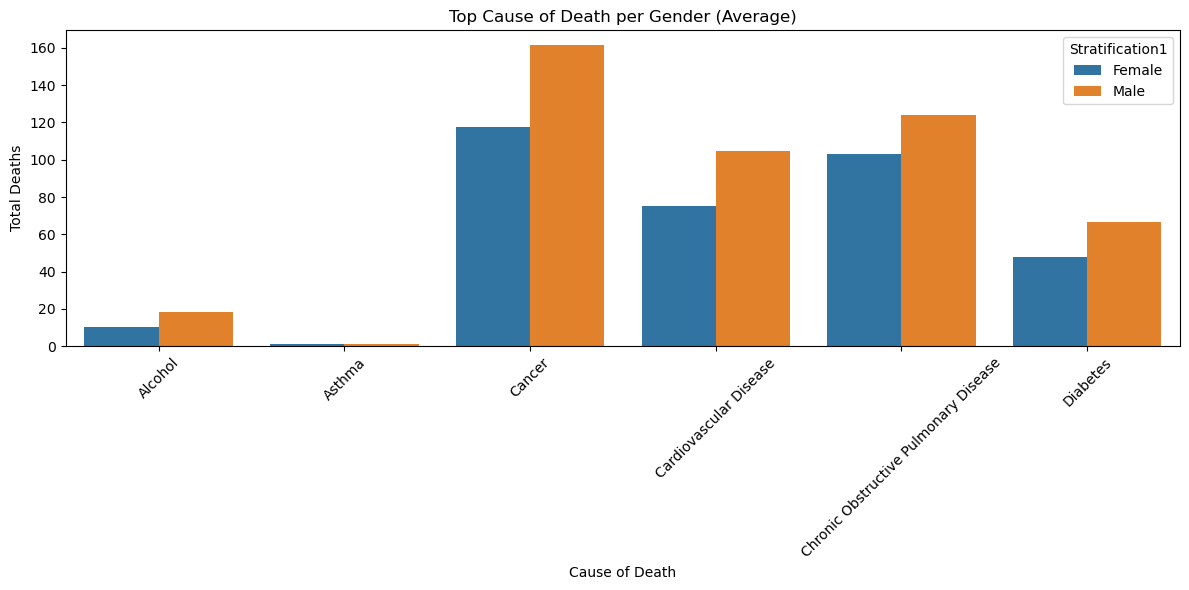

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(data=s, x='Topic', y='DataValue', hue='Stratification1')

plt.title('Top Cause of Death per Gender (Average)')
plt.ylabel('Total Deaths')
plt.xlabel('Cause of Death')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
# reseting the index and saving the top causes per gender as a csv file

In [11]:
causes_gender = s.reset_index()
causes_gender = causes_gender.drop(columns = 'index')
causes_gender

,Topic,Stratification1,DataValue
0,Alcohol,Female,10.494388
1,Alcohol,Male,18.280203
2,Asthma,Female,1.356154
3,Asthma,Male,1.036607
4,Cancer,Female,117.692708
5,Cancer,Male,161.365865
6,Cardiovascular Disease,Female,74.938827
7,Cardiovascular Disease,Male,104.612243
8,Chronic Obstructive Pulmonary Disease,Female,103.140523
9,Chronic Obstructive Pulmonary Disease,Male,123.801242


In [12]:
#mortality SEX per 100,000

Gender = causes_gender.groupby('Stratification1')['DataValue'].agg(['sum', 'min', 'max', 'median', 'mean']).reset_index()
Gender

,Stratification1,sum,min,max,median,mean
0,Female,355.282238,1.356154,117.692708,61.299233,59.213706
1,Male,475.493842,1.036607,161.365865,85.504962,79.248974


In [13]:
#saving the new data frame
causes_gender.to_csv('Top_Cause_of_Death_in_US_per_Gender.csv', index=False)